In [1]:
import platform
import PIL  # Pillow 包通常在 Python 中以 PIL 名称导入
import jupyterlab
import matplotlib
import ipympl
import numpy as np
import pandas as pd

# 打印 Python 版本
print("Python version:", platform.python_version())

# 打印 Pillow 版本
print("Pillow version:", PIL.__version__)

# 打印 JupyterLab 版本
print("JupyterLab version:", jupyterlab.__version__)

# 打印 matplotlib 版本
print("matplotlib version:", matplotlib.__version__)

# 打印 ipympl 版本
print("ipympl version:", ipympl.__version__)


# Python version: 3.10.16
# Pillow version: 11.1.0
# JupyterLab version: 4.3.5
# matplotlib version: 3.10.0
# ipympl version: 0.9.6


Python version: 3.10.16
Pillow version: 11.1.0
JupyterLab version: 4.3.5
matplotlib version: 3.10.0
ipympl version: 0.9.6


In [2]:
import sys
sys.path.append('/Volumes/khammash/MC/cytoflex/Open_flow')
from openflow import InteractivePolygonGating, InteractiveHistogramThreshold

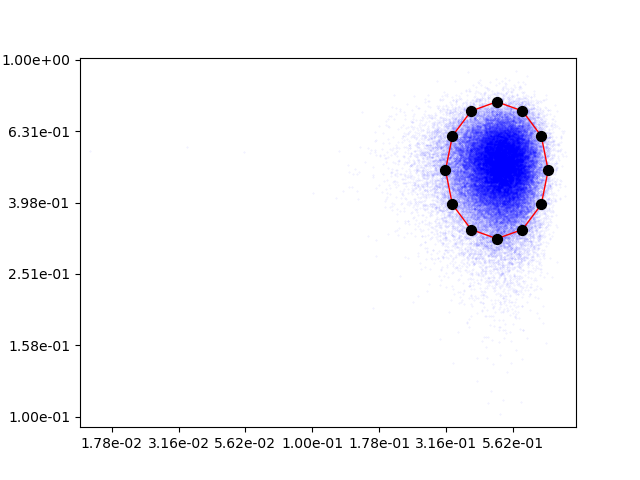

In [3]:
# Example usage:
if __name__ == "__main__":
    np.random.seed(0)
    # Generate sample data using normal distribution
    data = {
        'x': np.random.normal(0.5, 0.1, 60000),
        'y': np.random.normal(0.5, 0.1, 60000)
    }
    df = pd.DataFrame(data)

    # Create an instance of InteractivePolygonGating with 5 vertices and logarithmic scale enabled.
    gate1 = InteractivePolygonGating(df, 'x', 'y', num_edges=12, log=True)
    # As you drag the polygon the histograms and scatter plot will update.



        FSC-H       FSC-A       SSC-H        SSC-A        FL5-H       FL5-A  \
0  2926145.50   5057536.0  1940768.25   2544238.25   894.299988   48.099998   
1  3230785.25   6522216.0  3244316.00   5305990.50   860.299988  -28.400000   
2  3816514.75  13362046.0  5572750.50  14123057.00  1401.099976  837.400024   
3  3560359.75   7102374.5  5601165.00   8264883.50  1349.599976  347.899994   
4  3276116.25   6446155.0  3173910.50   4324650.50   887.900024  547.000000   

       FL11-H      FL11-A         FL8-H          FL8-A    FSC-Width   Time  
0  318.700012   59.799999   4605.000000    6252.600098  1769.877686    0.0  
1  310.200012  204.800003   4552.600098    7512.399902  2067.222412  308.0  
2  347.700012  106.599998  59288.398438  131171.093750  3585.141357  387.0  
3  356.299988  232.100006   5840.500000    9066.000000  2042.728027  913.0  
4  386.399994  229.600006   3388.199951    4999.500000  2014.846191  968.0  


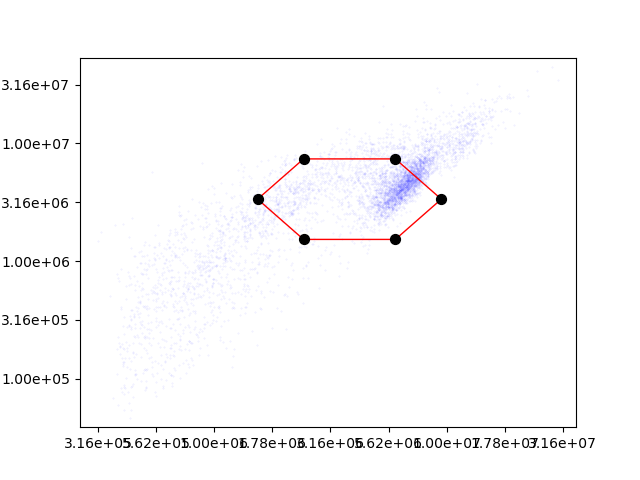

In [4]:

import FlowCal
import pandas as pd

# Read the .facs file
file_path = r'/Volumes/khammash/MC/cytoflex/Exp_20250407_1/Exp_20250407_2/01-Well-A1.fcs'
data = FlowCal.io.FCSData(file_path)

# Convert to a pandas DataFrame
df = pd.DataFrame(data, columns=data.channels)
print(df.head())

# Filter the DataFrame

filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]

# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate1 = InteractivePolygonGating(filtered_df, 'FSC-A', 'SSC-A', num_edges=6, log=True)


In [5]:
data.__dict__

{'_infile': '/Volumes/khammash/MC/cytoflex/Exp_20250407_1/Exp_20250407_2/01-Well-A1.fcs',
 '_text': {'$BEGINSTEXT': '0',
  '$ENDSTEXT': '0',
  '$BEGINDATA': '0000000000006672',
  '$ENDDATA': '0000000000255839',
  '$BEGINANALYSIS': '0',
  '$ENDANALYSIS': '0',
  '$TOT': '0000000000005191',
  'FILVER': '1',
  '$FIL': '01-Well-A1.fcs',
  '$SYS': 'Microsoft Windows NT 6.2.9200.0',
  '$MODE': 'L',
  '$BYTEORD': '1,2,3,4',
  '$DATATYPE': 'F',
  '$NEXTDATA': '0',
  'CYTEXPERTFIL': 'True',
  'TBID': '8fc3be13-f8a7-4c0a-845f-5241cdf266ad',
  'TBNM': '01-Well-A1',
  '$PAR': '12',
  '$BTIM': '14:34:02',
  '$ETIM': '14:34:36',
  '$DATE': '07-Apr-2025',
  '$CYT': 'CytoFLEX S',
  'RCTOT': '10000',
  'USRCTOT': 'True',
  'CGNM': 'All Events ',
  'RCTIM': '34',
  'USRCTIM': 'True',
  '$SPILLOVER': '6,FL5-H,FL11-H,FL8-H,FL5-A,FL11-A,FL8-A,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1',
  'RCVOL': '10',
  'USRCVOL': 'False',
  '$TIMESTEP': '0.00002',
  '$P1N': 'FSC-H',
  '$P1S':

In [6]:
data._channel_labels

('FSC-H',
 'FSC-A',
 'SSC-H',
 'SSC-A',
 'FITC-H',
 'FITC-A',
 'APC-H',
 'APC-A',
 'mCherry-H',
 'mCherry-A',
 'FSC-Width',
 'Time')

In [21]:
data.channels

('FSC-H',
 'FSC-A',
 'SSC-H',
 'SSC-A',
 'FL5-H',
 'FL5-A',
 'FL11-H',
 'FL11-A',
 'FL8-H',
 'FL8-A',
 'FSC-Width',
 'Time')

In [6]:
df2 = gate1.selected_data
print(df2.head())

        FSC-H       FSC-A       SSC-H        SSC-A        FL5-H       FL5-A  \
0  2926145.50   5057536.0  1940768.25   2544238.25   894.299988   48.099998   
1  3230785.25   6522216.0  3244316.00   5305990.50   860.299988  -28.400000   
2  3816514.75  13362046.0  5572750.50  14123057.00  1401.099976  837.400024   
3  3560359.75   7102374.5  5601165.00   8264883.50  1349.599976  347.899994   
4  3276116.25   6446155.0  3173910.50   4324650.50   887.900024  547.000000   

       FL11-H      FL11-A         FL8-H          FL8-A    FSC-Width   Time  
0  318.700012   59.799999   4605.000000    6252.600098  1769.877686    0.0  
1  310.200012  204.800003   4552.600098    7512.399902  2067.222412  308.0  
2  347.700012  106.599998  59288.398438  131171.093750  3585.141357  387.0  
3  356.299988  232.100006   5840.500000    9066.000000  2042.728027  913.0  
4  386.399994  229.600006   3388.199951    4999.500000  2014.846191  968.0  


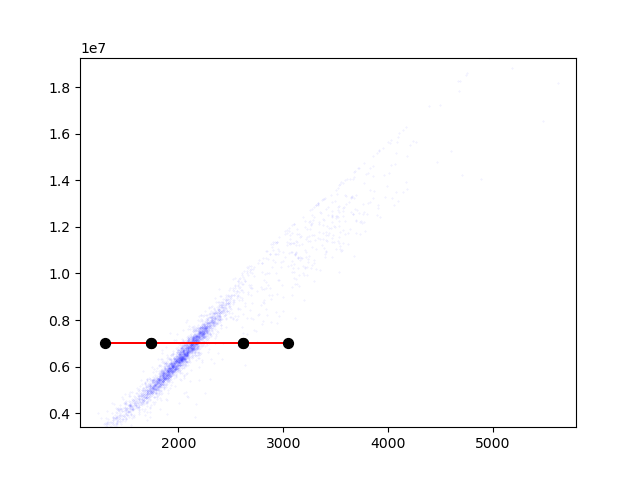

In [7]:
# selector = InteractivePolygonSelector(df, 'FSC-A', 'SSC-A', num_edges=5, log_log=True)
gate2 = InteractivePolygonGating(df2, 'FSC-Width', 'FSC-A', num_edges=6, log=False)


In [8]:
df3 = gate2.selected_data
print(df3.head())

        FSC-H      FSC-A       SSC-H       SSC-A        FL5-H       FL5-A  \
0  2926145.50  5057536.0  1940768.25  2544238.25   894.299988   48.099998   
1  3230785.25  6522216.0  3244316.00  5305990.50   860.299988  -28.400000   
3  3560359.75  7102374.5  5601165.00  8264883.50  1349.599976  347.899994   
4  3276116.25  6446155.0  3173910.50  4324650.50   887.900024  547.000000   
5  3369152.50  7106570.5  3131297.75  4121376.25  1196.699951  436.200012   

       FL11-H      FL11-A        FL8-H        FL8-A    FSC-Width    Time  
0  318.700012   59.799999  4605.000000  6252.600098  1769.877686     0.0  
1  310.200012  204.800003  4552.600098  7512.399902  2067.222412   308.0  
3  356.299988  232.100006  5840.500000  9066.000000  2042.728027   913.0  
4  386.399994  229.600006  3388.199951  4999.500000  2014.846191   968.0  
5  306.000000   92.199997  3931.199951  6140.899902  2159.928467  1186.0  


Number of selected items: 2672


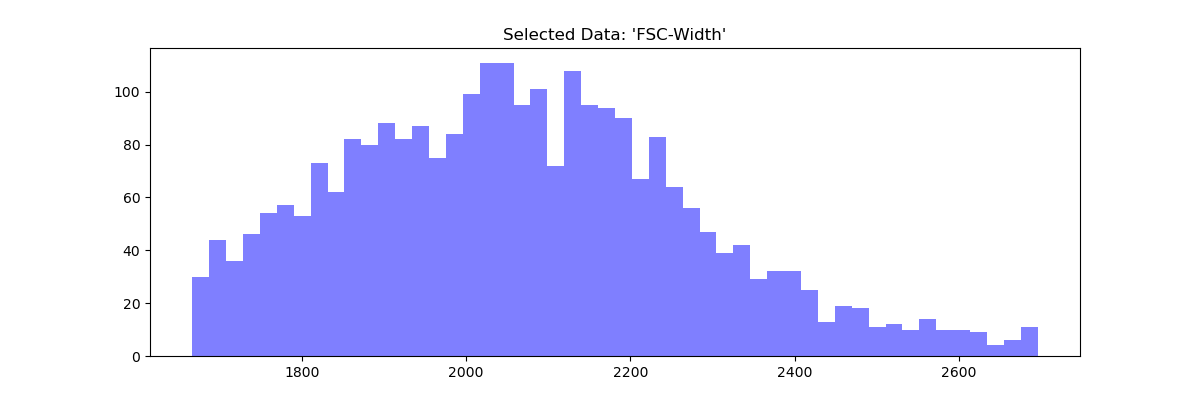

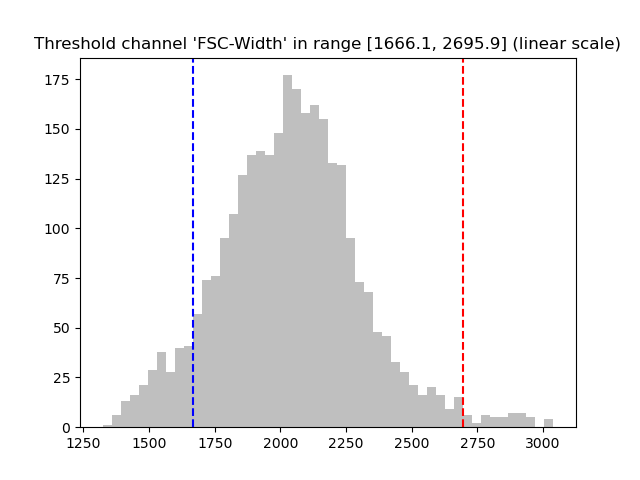

In [12]:
gate3 = InteractiveHistogramThreshold(
    data=df3,
    threshold_channel='FSC-Width',
    plot_channels=['FSC-Width']
)

In [22]:
# Get Valid range of singlet
df4 = gate3.selected_data
print(df4.head())
df4

        FSC-H      FSC-A       SSC-H       SSC-A        FL5-H       FL5-A  \
1  3230785.25  6522216.0  3244316.00  5305990.50   860.299988  -28.400000   
3  3560359.75  7102374.5  5601165.00  8264883.50  1349.599976  347.899994   
4  3276116.25  6446155.0  3173910.50  4324650.50   887.900024  547.000000   
5  3369152.50  7106570.5  3131297.75  4121376.25  1196.699951  436.200012   
7  3504772.25  7407120.5  4725129.50  6639414.00   851.000000  288.600006   

       FL11-H      FL11-A        FL8-H        FL8-A    FSC-Width    Time  
1  310.200012  204.800003  4552.600098  7512.399902  2067.222412   308.0  
3  356.299988  232.100006  5840.500000  9066.000000  2042.728027   913.0  
4  386.399994  229.600006  3388.199951  4999.500000  2014.846191   968.0  
5  306.000000   92.199997  3931.199951  6140.899902  2159.928467  1186.0  
7  377.500000  369.000000  2400.300049  3200.500000  2164.163574  1421.0  


,FSC-H,FSC-A,SSC-H,SSC-A,FL5-H,FL5-A,FL11-H,FL11-A,FL8-H,FL8-A,FSC-Width,Time
1,3230785.25,6522216.0,3244316.00,5305990.50,860.299988,-28.400000,310.200012,204.800003,4552.600098,7512.399902,2067.222412,308.0
3,3560359.75,7102374.5,5601165.00,8264883.50,1349.599976,347.899994,356.299988,232.100006,5840.500000,9066.000000,2042.728027,913.0
4,3276116.25,6446155.0,3173910.50,4324650.50,887.900024,547.000000,386.399994,229.600006,3388.199951,4999.500000,2014.846191,968.0
5,3369152.50,7106570.5,3131297.75,4121376.25,1196.699951,436.200012,306.000000,92.199997,3931.199951,6140.899902,2159.928467,1186.0
7,3504772.25,7407120.5,4725129.50,6639414.00,851.000000,288.600006,377.500000,369.000000,2400.300049,3200.500000,2164.163574,1421.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5176,3651909.50,8322268.0,4161770.00,6830495.50,1024.599976,681.599976,289.600006,142.899994,117821.398438,198152.593750,2333.577881,1697370.0
5178,3283822.50,6976315.5,5449091.00,7615018.00,736.299988,140.699997,258.799988,150.100006,3068.300049,4894.200195,2175.440674,1697419.0
5179,3163634.00,6184525.5,2587314.25,3493455.00,909.400024,41.799999,329.600006,-27.900000,5920.600098,8556.400391,2001.798462,1697672.0
5183,3979502.00,11349713.0,5546940.00,12037517.00,1219.199951,607.000000,251.199997,155.300003,44960.500000,76051.000000,2920.496826,1698395.0


Number of selected items: 1577


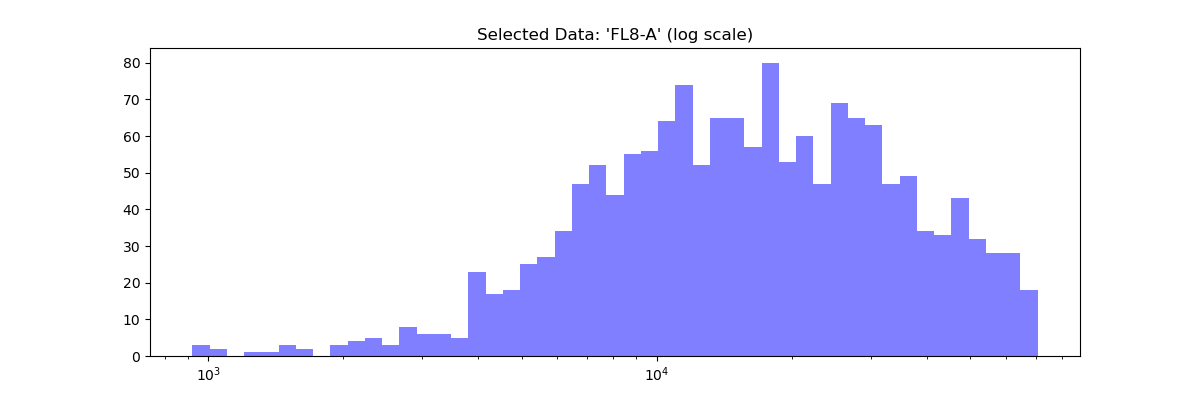

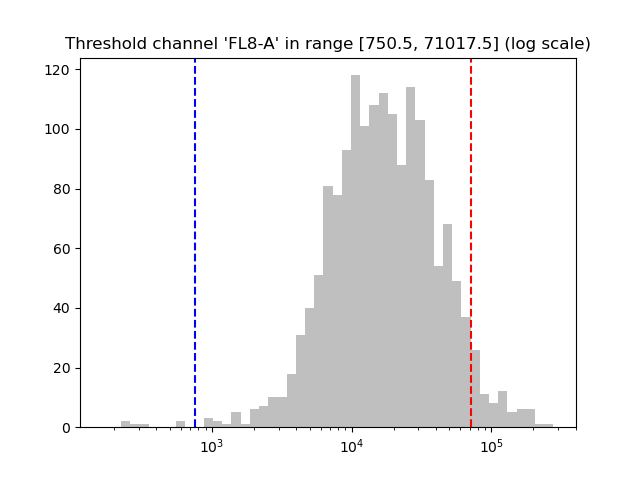

In [14]:
gate4 = InteractiveHistogramThreshold(
    data=df4,
    threshold_channel='FL8-A',
    plot_channels=['FL8-A'],
    log_scale = True
)

In [ ]:
import os
import pandas as pd
import FlowCal
from glob import glob
import numpy as np
from tqdm import tqdm

def auto_process(df, gating_strategy):
    """
    应用一系列门策略到数据框
    
    参数:
    df (pd.DataFrame): 输入数据框
    gating_strategy (list): 要应用的门策略列表
    
    返回:
    pd.DataFrame: 经过所有门策略处理后的数据框
    """
    # 初始过滤 - 移除非正值
    filtered_df = df[(df['FSC-A'] > 0) & (df['SSC-A'] > 0)]
    results = filtered_df.copy()
    
    # 应用门策略序列
    for gate in gating_strategy:
        results = gate.apply_gate(results)
    
    return results

def process_all_fcs_files(folder_path, gating_strategy, file_pattern='*.fcs'):
    """
    处理文件夹中所有符合模式的.fcs文件
    
    参数:
    folder_path (str): 包含.fcs文件的文件夹路径
    gating_strategy (list): 要应用的门策略列表
    file_pattern (str): 文件匹配模式，默认为'*.fcs'
    
    返回:
    tuple: (合并的DataFrame, 每个文件的数据字典)
    """
    # 获取所有匹配的文件路径
    file_paths = glob(os.path.join(folder_path, file_pattern))
    
    if not file_paths:
        raise ValueError(f"在'{folder_path}'中没有找到匹配'{file_pattern}'的文件")
    
    print(f"找到{len(file_paths)}个文件进行处理")
    
    # 存储各个文件的处理后DataFrame
    processed_dfs = {}
    all_dfs = []
    
    # 处理每个文件
    for file_path in tqdm(file_paths, desc="处理文件"):
        file_name = os.path.basename(file_path)
        
        try:
            # 读取.fcs文件
            data = FlowCal.io.FCSData(file_path)
            
            # 提取元数据 (可选)
            metadata = {
                'file_name': file_name,
                'event_count': data.shape[0],
                # 可以添加更多元数据
            }
            
            # 转换为DataFrame
            df = pd.DataFrame(data, columns=data.channels)
            
            # 添加文件标识列
            df['file_name'] = file_name
            
            # 应用门策略
            processed_df = auto_process(df, gating_strategy)
            
            # 存储结果
            processed_dfs[file_name] = {
                'data': processed_df,
                'metadata': metadata,
                'original_event_count': df.shape[0],
                'processed_event_count': processed_df.shape[0]
            }
            
            # 添加到合并列表
            all_dfs.append(processed_df)
            
            print(f"处理完成: {file_name} - 原始事件: {df.shape[0]}, 处理后事件: {processed_df.shape[0]}")
            
        except Exception as e:
            print(f"处理文件'{file_name}'时出错: {str(e)}")
    
    # 合并所有处理后的DataFrame
    if all_dfs:
        combined_df = pd.concat(all_dfs, ignore_index=True)
        print(f"所有文件处理完成。合并后的DataFrame包含{combined_df.shape[0]}行和{combined_df.shape[1]}列。")
    else:
        combined_df = pd.DataFrame()
        print("没有成功处理任何文件。")
    
    return combined_df, processed_dfs

def save_results(combined_df, processed_dfs, output_folder, base_filename="processed_data"):
    """
    保存处理结果
    
    参数:
    combined_df (pd.DataFrame): 合并的数据框
    processed_dfs (dict): 每个文件的处理结果字典
    output_folder (str): 输出文件夹路径
    base_filename (str): 基本文件名
    """
    # 确保输出文件夹存在
    os.makedirs(output_folder, exist_ok=True)
    
    # 保存合并的DataFrame
    if not combined_df.empty:
        combined_path = os.path.join(output_folder, f"{base_filename}_combined.csv")
        combined_df.to_csv(combined_path, index=False)
        print(f"合并数据已保存至: {combined_path}")
    
    # 保存处理统计信息
    stats = []
    for file_name, info in processed_dfs.items():
        stats.append({
            'file_name': file_name,
            'original_events': info['original_event_count'],
            'processed_events': info['processed_event_count'],
            'retention_rate': info['processed_event_count'] / info['original_event_count'] if info['original_event_count'] > 0 else 0
        })
    
    if stats:
        stats_df = pd.DataFrame(stats)
        stats_path = os.path.join(output_folder, f"{base_filename}_statistics.csv")
        stats_df.to_csv(stats_path, index=False)
        print(f"处理统计信息已保存至: {stats_path}")
    
    # 可选：单独保存每个处理后的文件
    for file_name, info in processed_dfs.items():
        file_base = os.path.splitext(file_name)[0]
        individual_path = os.path.join(output_folder, f"{file_base}_processed.csv")
        info['data'].to_csv(individual_path, index=False)

# 示例使用
if __name__ == "__main__":
    # 门策略已定义 (假设 gating_strategy = [gate1, gate2, gate3] 已经定义)
    gating_strategy = [gate1,gate2,gate3]
    folder_path = r'/Volumes/khammash/MC/cytoflex/Exp_20250407_1/Exp_20250407_2/'
    output_folder = r'/Volumes/khammash/MC/cytoflex/Exp_20250407_1/processed_results/'
    
    # 处理所有.fcs文件
    combined_df, processed_dfs = process_all_fcs_files(folder_path, gating_strategy)
    
    # 保存结果
    save_results(combined_df, processed_dfs, output_folder)
    
    # 显示合并数据的一些基本统计信息
    if not combined_df.empty:
        print("\n基本统计信息:")
        print(f"总事件数: {combined_df.shape[0]}")
        print(f"每个文件的平均事件数: {combined_df.shape[0] / len(processed_dfs):.2f}")
        
        # 按文件名分组统计
        file_counts = combined_df.groupby('file_name').size()
        print("\n每个文件的事件数:")
        print(file_counts)

找到12个文件进行处理


处理文件: 100%|██████████| 12/12 [00:00<00:00, 53.46it/s]

Applied gate to new data. Selected 611 out of 1022 items.
处理完成: 01-Well-A4.fcs - 原始事件: 2554, 处理后事件: 611
Applied gate to new data. Selected 1660 out of 2952 items.
处理完成: 01-Well-A1.fcs - 原始事件: 5191, 处理后事件: 1660
Applied gate to new data. Selected 543 out of 802 items.
处理完成: 01-Well-A7.fcs - 原始事件: 1539, 处理后事件: 543
Applied gate to new data. Selected 265 out of 402 items.
处理完成: 01-Well-A3.fcs - 原始事件: 938, 处理后事件: 265
Applied gate to new data. Selected 765 out of 1529 items.
处理完成: 01-Well-A9.fcs - 原始事件: 2957, 处理后事件: 765
Applied gate to new data. Selected 634 out of 1102 items.
处理完成: 01-Well-A6.fcs - 原始事件: 2618, 处理后事件: 634
Applied gate to new data. Selected 1005 out of 2054 items.
处理完成: 01-Well-A11.fcs - 原始事件: 3484, 处理后事件: 1005
Applied gate to new data. Selected 346 out of 846 items.
处理完成: 01-Well-A10.fcs - 原始事件: 1760, 处理后事件: 346
Applied gate to new data. Selected 205 out of 656 items.
处理完成: 01-Well-A12.fcs - 原始事件: 1353, 处理后事件: 205
Applied gate to new data. Selected 101 out of 252 items.
处理完成:

合并数据已保存至: /Volumes/khammash/MC/cytoflex/Exp_20250407_1/processed_results/processed_data_combined.csv
处理统计信息已保存至: /Volumes/khammash/MC/cytoflex/Exp_20250407_1/processed_results/processed_data_statistics.csv

基本统计信息:
总事件数: 8942
每个文件的平均事件数: 745.17

每个文件的事件数:
file_name
01-Well-A1.fcs     1660
01-Well-A10.fcs     346
01-Well-A11.fcs    1005
01-Well-A12.fcs     205
01-Well-A2.fcs     2340
01-Well-A3.fcs      265
01-Well-A4.fcs      611
01-Well-A5.fcs      467
01-Well-A6.fcs      634
01-Well-A7.fcs      543
01-Well-A8.fcs      101
01-Well-A9.fcs      765
dtype: int64


正在读取数据文件: /Volumes/khammash/MC/cytoflex/Exp_20250407_1/processed_results/processed_data_combined.csv
成功读取数据，共8942行，13列
FL8-A分组统计结果：
          file_name     FL8-A Mean      FL8-A Std  Sample Size      FL8-A CI  \
0    01-Well-A1.fcs   24864.587530   25955.278349         1660   1248.612614   
1   01-Well-A10.fcs   68449.071387   64048.803421          346   6748.838608   
2   01-Well-A11.fcs   27523.632836   46199.693164         1005   2856.354666   
3   01-Well-A12.fcs   84270.539024   62596.211790          205   8568.941780   
4    01-Well-A2.fcs   60865.899402   62466.076994         2340   2531.001338   
5    01-Well-A3.fcs   66162.217358   74691.744304          265   8993.023664   
6    01-Well-A4.fcs   93664.319804   86865.044159          611   6887.799729   
7    01-Well-A5.fcs  172887.849679  135184.936773          467  12261.001154   
8    01-Well-A6.fcs  123839.200473  144959.046479          634  11283.836015   
9    01-Well-A7.fcs   77726.484162   68660.263347          543   577

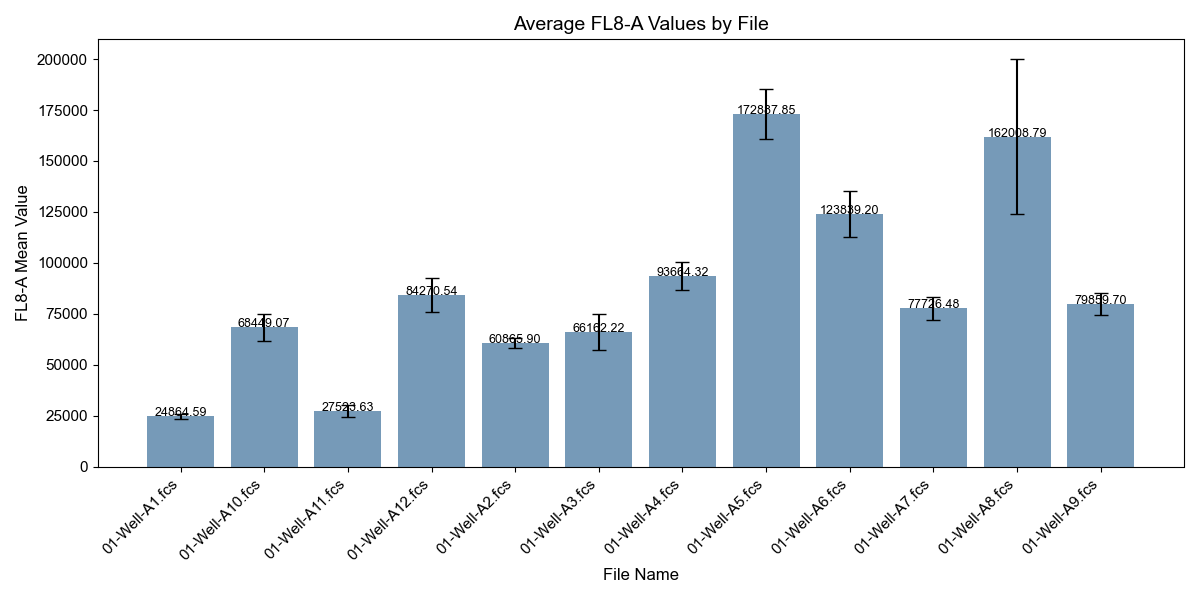

按样本量排序的条形图已保存至: /Volumes/khammash/MC/cytoflex/Exp_20250407_1/analysis_results/FL8-A_by_file_sorted.png


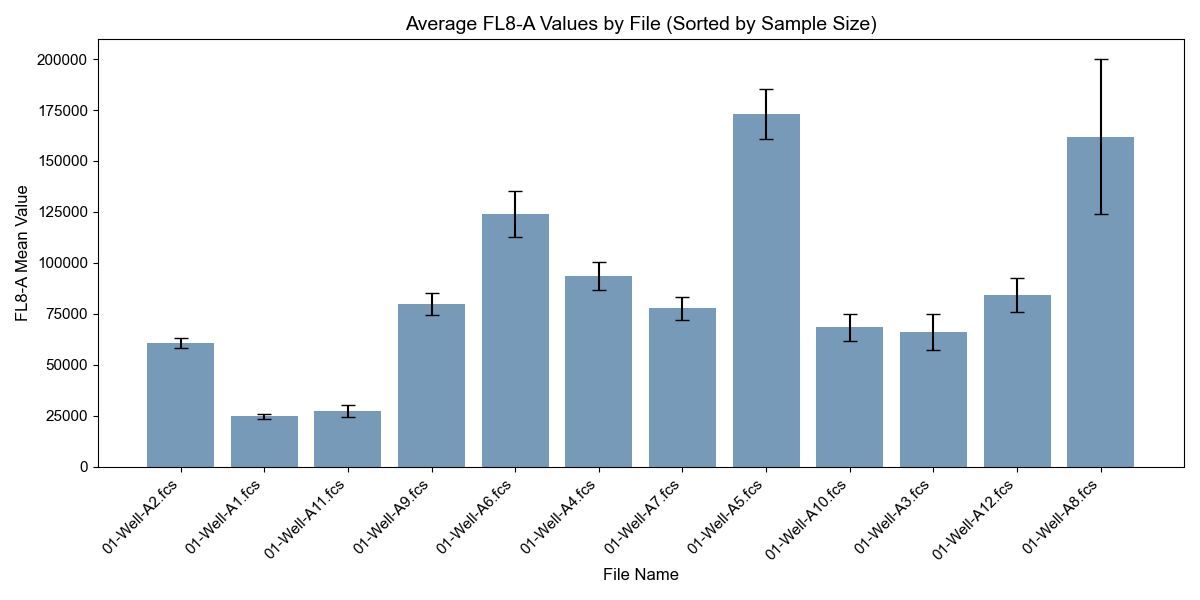

FL8-A统计数据已保存至: /Volumes/khammash/MC/cytoflex/Exp_20250407_1/analysis_results/FL8-A_statistics.csv


In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
from matplotlib.ticker import ScalarFormatter

def analyze_fl8_by_file(csv_path, output_folder=None):
    """
    读取处理后的CSV数据，按文件名分组计算FL8-A平均值并生成条形图
    
    参数:
    csv_path (str): 处理后合并数据的CSV文件路径
    output_folder (str, optional): 图表输出文件夹，如不指定则只显示不保存
    
    返回:
    pd.DataFrame: 包含每个文件FL8-A平均值、标准差和样本量的数据框
    """
    # 设置简洁风格
    plt.style.use('seaborn-v0_8-pastel')
    
    # 确保输出文件夹存在
    if output_folder:
        os.makedirs(output_folder, exist_ok=True)
    
    # 读取CSV文件
    print(f"正在读取数据文件: {csv_path}")
    df = pd.read_csv(csv_path)
    
    # 检查必要的列是否存在
    if 'file_name' not in df.columns:
        raise ValueError("数据中缺少'file_name'列")
    if 'FL8-A' not in df.columns:
        raise ValueError("数据中缺少'FL8-A'列")
    
    print(f"成功读取数据，共{df.shape[0]}行，{df.shape[1]}列")
    
    # 按文件名分组，计算FL8-A的平均值
    fl8_stats = df.groupby('file_name')['FL8-A'].agg(['mean', 'std', 'count']).reset_index()
    fl8_stats = fl8_stats.rename(columns={
        'mean': 'FL8-A Mean', 
        'std': 'FL8-A Std', 
        'count': 'Sample Size'
    })
    
    # 计算95%置信区间
    fl8_stats['FL8-A CI'] = 1.96 * fl8_stats['FL8-A Std'] / np.sqrt(fl8_stats['Sample Size'])
    
    # 提取文件名中的关键信息（假设格式为："Well-A1.fcs"）
    fl8_stats['Well'] = fl8_stats['file_name'].str.extract(r'([A-Z]\d+)')
    
    print("FL8-A分组统计结果：")
    print(fl8_stats)
    
    # 选择一种好看的颜色
    bar_color = '#4682B4'  # 钢蓝色 (Steel Blue)
    
    # 创建条形图
    plt.figure(figsize=(12, 6))
    
    # 使用seaborn生成条形图，使用单一颜色
    ax = sns.barplot(
        x='file_name', 
        y='FL8-A Mean', 
        data=fl8_stats,
        color=bar_color,
        capsize=0.1,
        alpha=0.8
    )
    
    # 添加误差线（95%置信区间）
    for i, row in fl8_stats.iterrows():
        ax.errorbar(
            i, row['FL8-A Mean'], 
            yerr=row['FL8-A CI'], 
            fmt='none', 
            c='black', 
            capsize=5
        )
    
    # 如果文件太多，调整x轴标签
    if len(fl8_stats) > 10:
        plt.xticks(rotation=45, ha='right')
    
    # 设置图表标题和标签
    plt.title('Average FL8-A Values by File', fontsize=14)
    plt.xlabel('File Name', fontsize=12)
    plt.ylabel('FL8-A Mean Value', fontsize=12)
    
    # 添加数据标签
    for i, v in enumerate(fl8_stats['FL8-A Mean']):
        ax.text(i, v + 0.1, f"{v:.2f}", ha='center', fontsize=9)
    
    # 优化布局
    plt.tight_layout()
    
    # 保存图表（如果指定了输出文件夹）
    if output_folder:
        output_path = os.path.join(output_folder, 'FL8-A_by_file.png')
        plt.savefig(output_path, dpi=300)
        print(f"条形图已保存至: {output_path}")
    
    # 显示图表
    plt.show()
    
    # 创建对数刻度版本（如果数据变化范围大）
    if fl8_stats['FL8-A Mean'].max() / fl8_stats['FL8-A Mean'].min() > 10:
        plt.figure(figsize=(12, 6))
        
        # 使用seaborn生成条形图（对数刻度）
        ax = sns.barplot(
            x='file_name', 
            y='FL8-A Mean', 
            data=fl8_stats,
            color=bar_color,
            capsize=0.1,
            alpha=0.8
        )
        
        # 设置对数刻度
        plt.yscale('log')
        
        # 格式化y轴标签为正常数字（非科学计数法）
        ax.yaxis.set_major_formatter(ScalarFormatter())
        
        # 如果文件太多，调整x轴标签
        if len(fl8_stats) > 10:
            plt.xticks(rotation=45, ha='right')
        
        # 设置图表标题和标签
        plt.title('Average FL8-A Values by File (Log Scale)', fontsize=14)
        plt.xlabel('File Name', fontsize=12)
        plt.ylabel('FL8-A Mean Value (Log Scale)', fontsize=12)
        
        # 优化布局
        plt.tight_layout()
        
        # 保存图表（如果指定了输出文件夹）
        if output_folder:
            output_path = os.path.join(output_folder, 'FL8-A_by_file_log_scale.png')
            plt.savefig(output_path, dpi=300)
            print(f"对数刻度条形图已保存至: {output_path}")
        
        # 显示图表
        plt.show()
    
    # 创建按样本量大小排序的版本
    plt.figure(figsize=(12, 6))
    
    # 按样本量排序
    fl8_stats_sorted = fl8_stats.sort_values('Sample Size', ascending=False)
    
    # 生成条形图
    ax = sns.barplot(
        x='file_name', 
        y='FL8-A Mean', 
        data=fl8_stats_sorted,
        order=fl8_stats_sorted['file_name'],
        color=bar_color,
        capsize=0.1,
        alpha=0.8
    )
    
    # 添加误差线
    for i, (_, row) in enumerate(fl8_stats_sorted.iterrows()):
        ax.errorbar(
            i, row['FL8-A Mean'], 
            yerr=row['FL8-A CI'], 
            fmt='none', 
            c='black', 
            capsize=5
        )
    
    # 如果文件太多，调整x轴标签
    if len(fl8_stats) > 10:
        plt.xticks(rotation=45, ha='right')
    
    # 设置图表标题和标签
    plt.title('Average FL8-A Values by File (Sorted by Sample Size)', fontsize=14)
    plt.xlabel('File Name', fontsize=12)
    plt.ylabel('FL8-A Mean Value', fontsize=12)
    
    # 优化布局
    plt.tight_layout()
    
    # 保存图表（如果指定了输出文件夹）
    if output_folder:
        output_path = os.path.join(output_folder, 'FL8-A_by_file_sorted.png')
        plt.savefig(output_path, dpi=300)
        print(f"按样本量排序的条形图已保存至: {output_path}")
    
    # 显示图表
    plt.show()
    
    # 输出CSV统计数据
    if output_folder:
        stats_path = os.path.join(output_folder, 'FL8-A_statistics.csv')
        fl8_stats.to_csv(stats_path, index=False)
        print(f"FL8-A统计数据已保存至: {stats_path}")
    
    return fl8_stats

# 示例使用
if __name__ == "__main__":
    # 设置文件路径
    csv_path = r'/Volumes/khammash/MC/cytoflex/Exp_20250407_1/processed_results/processed_data_combined.csv'
    output_folder = r'/Volumes/khammash/MC/cytoflex/Exp_20250407_1/analysis_results/'
    
    # 分析数据并生成图表
    fl8_stats = analyze_fl8_by_file(csv_path, output_folder)

In [ ]:
# A5>A6>A2>A1

# Think about seeding these 4 samples;

